# Input 

In [1]:
import pandas as pd

data =pd.read_excel('SDR2024-data.xlsx', sheet_name=None)

raw_data=data['Raw Data - Panel']
raw_data.head(10)

,id,Country,year,indexreg,sdg1_wpc,sdg1_lmicpov,sdg1_oecdpov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,...,sdg16_exprop,sdg16_prison,sdg17_govex,sdg17_oda,sdg17_govrev,sdg17_cohaven,sdg17_secrecy,sdg17_sprofits,sdg17_statperf,sdg17_multilat
0,AFG,Afghanistan,2000,E. Europe & C. Asia,61.704,85.021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2001,E. Europe & C. Asia,60.977,84.600,NaN,46.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2002,E. Europe & C. Asia,60.256,84.167,NaN,44.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,2003,E. Europe & C. Asia,57.456,82.395,NaN,39.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2004,E. Europe & C. Asia,58.409,82.993,NaN,36.3,59.3,9.1,...,NaN,22.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Afghanistan,2005,E. Europe & C. Asia,54.004,79.982,NaN,34.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Afghanistan,2006,E. Europe & C. Asia,52.240,78.643,NaN,31.9,NaN,NaN,...,NaN,30.287,5.185,NaN,8.968,NaN,NaN,NaN,NaN,NaN
7,AFG,Afghanistan,2007,E. Europe & C. Asia,46.023,73.628,NaN,28.6,NaN,NaN,...,NaN,40.883,4.735,NaN,7.009,NaN,NaN,NaN,NaN,NaN
8,AFG,Afghanistan,2008,E. Europe & C. Asia,44.769,72.406,NaN,25.4,NaN,NaN,...,NaN,47.300,5.014,NaN,8.053,NaN,NaN,NaN,NaN,NaN
9,AFG,Afghanistan,2009,E. Europe & C. Asia,35.504,63.439,NaN,22.2,NaN,NaN,...,NaN,NaN,5.341,NaN,10.575,NaN,NaN,NaN,NaN,NaN


In [2]:
raw_data.columns

Index(['id', 'Country', 'year', 'indexreg', 'sdg1_wpc', 'sdg1_lmicpov',
       'sdg1_oecdpov', 'sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting',
       ...
       'sdg16_exprop', 'sdg16_prison', 'sdg17_govex', 'sdg17_oda',
       'sdg17_govrev', 'sdg17_cohaven', 'sdg17_secrecy', 'sdg17_sprofits',
       'sdg17_statperf', 'sdg17_multilat'],
      dtype='object', length=129)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Columns: 129 entries, id to sdg17_multilat
dtypes: float64(125), int64(1), object(3)
memory usage: 4.7+ MB


In [4]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 129 columns):
 #    Column            Dtype  
---   ------            -----  
 0    id                object 
 1    Country           object 
 2    year              int64  
 3    indexreg          object 
 4    sdg1_wpc          float64
 5    sdg1_lmicpov      float64
 6    sdg1_oecdpov      float64
 7    sdg2_undernsh     float64
 8    sdg2_stunting     float64
 9    sdg2_wasting      float64
 10   sdg2_obesity      float64
 11   sdg2_trophic      float64
 12   sdg2_crlyld       float64
 13   sdg2_snmi         float64
 14   sdg2_yieldgap     float64
 15   sdg2_pestexp      float64
 16   sdg3_matmort      float64
 17   sdg3_neonat       float64
 18   sdg3_u5mort       float64
 19   sdg3_tb           float64
 20   sdg3_hiv          float64
 21   sdg3_ncds         float64
 22   sdg3_pollmort     float64
 23   sdg3_traffic      float64
 24   sdg3_lifee        float64
 25   sdg3_fertility    floa

In [5]:
Backdated_SDG_index=data["Backdated SDG Index"]

# Merging Data

In [6]:
backdated_data = data['Backdated SDG Index']
fulldata = data['Full Database']
codebook = data['Codebook']

In [7]:
backdated_data = backdated_data[['id', 'Country', 'year', 'SDG Index Score']]

dataset = pd.merge(
    raw_data,
    backdated_data,
    on=['Country', 'year'],
    how='left'
)

dataset = dataset.drop(columns=['id_x', 'id_y', 'indexreg'])

print(dataset.head())

       Country  year  sdg1_wpc  sdg1_lmicpov  sdg1_oecdpov  sdg2_undernsh  \
0  Afghanistan  2000    61.704        85.021           NaN            NaN   
1  Afghanistan  2001    60.977        84.600           NaN           46.4   
2  Afghanistan  2002    60.256        84.167           NaN           44.1   
3  Afghanistan  2003    57.456        82.395           NaN           39.0   
4  Afghanistan  2004    58.409        82.993           NaN           36.3   

   sdg2_stunting  sdg2_wasting  sdg2_obesity  sdg2_trophic  ...  sdg16_prison  \
0            NaN           NaN          4.25         2.295  ...           NaN   
1            NaN           NaN          4.60         2.217  ...           NaN   
2            NaN           NaN          4.97         2.294  ...           NaN   
3            NaN           NaN          5.37         2.264  ...           NaN   
4           59.3           9.1          5.79         2.265  ...        22.341   

   sdg17_govex  sdg17_oda  sdg17_govrev  sdg17_coh

In [8]:
# Lặp qua từng dòng của codebook để biết ánh xạ giữa tên chỉ số và mã cột
for _, row in codebook.iterrows():
    indicator_name = row['Indicator']
    ind_code = row['IndCode']

    if indicator_name in fulldata.columns and ind_code in dataset.columns:
        # Lấy cột Country và Indicator từ df_fulldata, lọc theo Year = 2024
        temp_df = fulldata[[indicator_name, f'Year: {ind_code}', 'Country']]
        temp_df = temp_df[temp_df[f'Year: {ind_code}'] == 2024]

        # Với mỗi Country phù hợp, gán giá trị vào df_dataset
        for _, temp_row in temp_df.iterrows():
            country = temp_row['Country']
            value = temp_row[indicator_name]

            # Xác định hàng trong df_dataset tương ứng với Country và year = 2024
            mask = (dataset['Country'] == country) & (dataset['year'] == 2024)
            dataset.loc[mask, ind_code] = value

# Cuối cùng, gán SDG Index Score
if '2024 SDG Index Score' in fulldata.columns and 'SDG Index Score' in dataset.columns:
    for _, row in fulldata.iterrows():
        country = row['Country']
        score = row['2024 SDG Index Score']
        dataset.loc[(dataset['Country'] == country) & (dataset['year'] == 2024), 'SDG Index Score'] = score


# Filling missing data base on dataset's codebook

*Chi tiết tại phần Codebook của Dataset*

## sdg2_undernsh: 2,5% cho các nước high-income

data source: https://ourworldindata.org/grapher/world-bank-income-groups

In [9]:
dataset['sdg2_undernsh'].isnull().sum()

1337

In [10]:
high_income_country=pd.read_csv('world-bank-income-groups.csv')
high_income_country

,Entity,Code,Year,World Bank's income classification
0,Afghanistan,AFG,1987,Low-income countries
1,Afghanistan,AFG,1988,Low-income countries
2,Afghanistan,AFG,1989,Low-income countries
3,Afghanistan,AFG,1990,Low-income countries
4,Afghanistan,AFG,1991,Low-income countries
...,...,...,...,...
7656,Zimbabwe,ZWE,2019,Lower-middle-income countries
7657,Zimbabwe,ZWE,2020,Lower-middle-income countries
7658,Zimbabwe,ZWE,2021,Lower-middle-income countries
7659,Zimbabwe,ZWE,2022,Lower-middle-income countries


In [11]:
# Lọc ra các dòng là quốc gia thu nhập cao
high_income = high_income_country[high_income_country["World Bank's income classification"] == "High-income countries"]

# Lặp qua từng dòng của high_income và gán giá trị
for _, row in high_income.iterrows():
    country = row['Entity']
    year = row['Year']
    
    mask = (dataset['Country'] == country) & (dataset['year'] == year)
    dataset.loc[mask, 'sdg2_undernsh'] = 2.5

In [12]:
dataset['sdg2_undernsh'].isnull().sum()

1019

## sdg2_stunting

In [13]:
dataset['sdg2_stunting'].isnull().sum()

4094

In [14]:
# Lặp qua từng dòng của high_income và gán giá trị
for _, row in high_income.iterrows():
    country = row['Entity']
    year = row['Year']
    
    mask = (dataset['Country'] == country) & (dataset['year'] == year)
    dataset.loc[mask, 'sdg2_stunting'] = 2.58

In [15]:
dataset['sdg2_stunting'].isnull().sum()

3028

## sdg2_wasting

In [16]:
dataset['sdg2_wasting'].isnull().sum()

4058

In [17]:
# Lặp qua từng dòng của high_income và gán giá trị
for _, row in high_income.iterrows():
    country = row['Entity']
    year = row['Year']
    
    mask = (dataset['Country'] == country) & (dataset['year'] == year)
    dataset.loc[mask, 'sdg2_wasting'] = 0.75

In [18]:
dataset['sdg2_wasting'].isnull().sum()

3022

## sd5_familypl

data source:  https://www.un.org/development/desa/pd/data/family-planning-indicators

In [19]:
dataset['sdg5_familypl'].isnull().sum()

4389

In [20]:
familypl = pd.read_csv('Data_FamilyPlanningIndicators_2024.csv', encoding='ISO-8859-1')
familypl

,IndicatorId,IndicatorName,IndicatorShortName,SourceId,DataSource,LocationId,Location,TimeId,Time,VariantId,...,AgeStart,AgeEnd,Age,CategoryId,Category,EstimateTypeId,EstimateType,EstimateMethodId,EstimateMethod,Value
0,1,Contraceptive prevalence: Any method (Percent),CPAnyP,29,Estimates and Projections of Family Planning I...,4,Afghanistan,41,1990,1,...,15,49,15-49,99,All women,1,Model-based Estimates,2,Interpolation,2.8
1,1,Contraceptive prevalence: Any method (Percent),CPAnyP,29,Estimates and Projections of Family Planning I...,4,Afghanistan,41,1990,2,...,15,49,15-49,99,All women,1,Model-based Estimates,2,Interpolation,3.5
2,1,Contraceptive prevalence: Any method (Percent),CPAnyP,29,Estimates and Projections of Family Planning I...,4,Afghanistan,41,1990,4,...,15,49,15-49,99,All women,1,Model-based Estimates,2,Interpolation,5.0
3,1,Contraceptive prevalence: Any method (Percent),CPAnyP,29,Estimates and Projections of Family Planning I...,4,Afghanistan,41,1990,5,...,15,49,15-49,99,All women,1,Model-based Estimates,2,Interpolation,7.3
4,1,Contraceptive prevalence: Any method (Percent),CPAnyP,29,Estimates and Projections of Family Planning I...,4,Afghanistan,41,1990,6,...,15,49,15-49,99,All women,1,Model-based Estimates,2,Interpolation,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564125,48,Total demand for family planning (Number),DEMTotN,29,Estimates and Projections of Family Planning I...,5555,Group C: Central and Southern Asia,81,2030,1,...,15,49,15-49,101,Unmarried women,1,Model-based Estimates,3,Projection,124326.0
2564126,48,Total demand for family planning (Number),DEMTotN,29,Estimates and Projections of Family Planning I...,5555,Group C: Central and Southern Asia,81,2030,2,...,15,49,15-49,101,Unmarried women,1,Model-based Estimates,3,Projection,148249.0
2564127,48,Total demand for family planning (Number),DEMTotN,29,Estimates and Projections of Family Planning I...,5555,Group C: Central and Southern Asia,81,2030,4,...,15,49,15-49,101,Unmarried women,1,Model-based Estimates,3,Projection,209160.0
2564128,48,Total demand for family planning (Number),DEMTotN,29,Estimates and Projections of Family Planning I...,5555,Group C: Central and Southern Asia,81,2030,5,...,15,49,15-49,101,Unmarried women,1,Model-based Estimates,3,Projection,314739.0


In [21]:
# Lấy danh sách quốc gia duy nhất
countries_dataset = set(dataset['Country'].unique())
locations_familypl = set(familypl['Location'].unique())

# Quốc gia có trong dataset nhưng không có trong familypl
only_in_dataset = countries_dataset - locations_familypl

# Quốc gia có trong familypl nhưng không có trong dataset
only_in_familypl = locations_familypl - countries_dataset

print("Có trong dataset nhưng không có trong familypl:")
print(sorted(only_in_dataset))

print("\nCó trong familypl nhưng không có trong dataset:")
print(sorted(only_in_familypl))


Có trong dataset nhưng không có trong familypl:
['Andorra', 'Bahamas, The', 'Bolivia', 'Brunei Darussalam', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Cyprus', 'Egypt, Arab Rep.', 'Gambia, The', 'Iceland', 'Iran, Islamic Rep.', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Liechtenstein', 'Luxembourg', 'Micronesia, Fed. Sts.', 'Moldova', 'Monaco', 'San Marino', 'Seychelles', 'Slovak Republic', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 'Tanzania', 'United States', 'Venezuela, RB', 'Vietnam', 'Yemen, Rep.']

Có trong familypl nhưng không có trong dataset:
['Africa', 'Anguilla', 'Asia', 'Australia/New Zealand', 'Bahamas', 'Bolivia (Plurinational State of)', 'Caribbean', 'Central America', 'Central Asia', 'Central and Southern Asia', 'China, Hong Kong SAR', 'China, Taiwan Province of China', 'Congo', 'Cook Islands', 'Curaçao', "Côte d'Ivoire", "Dem. People's Rep. of Korea", 'Dem. Rep. of the Congo', 'Developed regions', 'Developing 

In [22]:
country_name_mapping = {
    'Bahamas, The': 'Bahamas',
    'Bolivia': 'Bolivia (Plurinational State of)',
    'Brunei Darussalam': 'Brunei Darussalam', 
    'Congo, Dem. Rep.': 'Dem. Rep. of the Congo',
    'Congo, Rep.': 'Congo',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Egypt, Arab Rep.': 'Egypt',
    'Gambia, The': 'Gambia',
    'Iran, Islamic Rep.': 'Iran (Islamic Republic of)',
    'Korea, Dem. Rep.': "Dem. People's Rep. of Korea",
    'Korea, Rep.': 'Republic of Korea',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': "Lao People's Dem. Republic",
    'Micronesia, Fed. Sts.': 'Micronesia',
    'Moldova': 'Republic of Moldova',
    'Slovak Republic': 'Slovakia',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Tanzania': 'United Republic of Tanzania',
    'United States': 'United States of America',
    'Venezuela, RB': 'Venezuela (Bolivarian Republic of)',
    'Vietnam': 'Viet Nam',
    'Yemen, Rep.': 'Yemen',
}


In [23]:
# Lọc familypl chỉ giữ Variant = 'Median'
familypl_median = familypl[familypl['Variant'] == 'Median']
familypl_median['Location'] = familypl_median['Location'].replace(country_name_mapping)

C:\Users\Bill Vo\AppData\Local\Temp\ipykernel_18132\1675574800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  familypl_median['Location'] = familypl_median['Location'].replace(country_name_mapping)


In [24]:
# Lặp qua từng dòng và gán giá trị
for _, row in familypl_median.iterrows():
    country = row['Location']
    year = row['Time']
    value = row['Value']

    mask = (dataset['Country'] == country) & (dataset['year'] == year)
    dataset.loc[mask, 'sdg5_familypl'] = value

In [25]:
dataset['sdg5_familypl'].isnull().sum()

777

## sdg6_safewat

In [26]:
dataset['sdg6_safewat'].isnull().sum()

1991

In [27]:
# Lặp theo từng năm có trong df_dataset
years = dataset['year'].unique()

for y in years:
    # Lấy giá trị của New Zealand năm y
    value_nz = dataset.loc[(dataset['Country'] == 'New Zealand') & (dataset['year'] == y), 'sdg6_safewat']
    
    if not value_nz.empty:
        value = value_nz.values[0]
        # Gán giá trị đó cho Australia cùng năm
        dataset.loc[(dataset['Country'] == 'Australia') & (dataset['year'] == y), 'sdg6_safewat'] = value

In [28]:
dataset['sdg6_safewat'].isnull().sum()

1969

## sdg9_uni

data source: https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023?utm_source=chatgpt.com&select=2024_rankings.csv

In [29]:
dataset['sdg9_uni'].isnull().sum()

3836

### Xử lý dữ liệu University Ranking

In [30]:
all_rankings = []

for year in range(2011, 2025):
    file_path = f"{year}_rankings.csv"
    df = pd.read_csv(file_path)

    # Đảm bảo các cột liên quan đều là số
    for col in [
        "scores_teaching",
        "scores_research",
        "scores_citations",
        "scores_industry_income",
        "scores_international_outlook"
    ]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Tính lại điểm tổng thể (score) cho toàn bộ dòng
    df["score"] = (
        df["scores_teaching"] * 0.3 +
        df["scores_research"] * 0.3 +
        df["scores_citations"] * 0.3 +
        df["scores_international_outlook"] * 0.075 +
        df["scores_industry_income"] * 0.025
    )

    # Thêm cột năm
    df["year"] = year

    # Đổi tên cột location → country (quốc gia)
    df = df.rename(columns={"location": "country"})

    # Chỉ giữ các cột cần thiết
    df = df[["name", "country", "score", "year"]]

    all_rankings.append(df)

full_ranking = pd.concat(all_rankings, ignore_index=True)

In [31]:
full_ranking

,name,country,score,year
0,Harvard University,United States,95.4525,2011
1,California Institute of Technology,United States,94.8675,2011
2,Massachusetts Institute of Technology,United States,95.0900,2011
3,Stanford University,United States,92.5000,2011
4,Princeton University,United States,NaN,2011
...,...,...,...,...
10587,Yokohama City University,Japan,33.4650,2024
10588,Zagazig University,Egypt,33.3600,2024
10589,University of Zaragoza,Spain,32.5625,2024
10590,ZHAW Zurich University of Applied Sciences,Switzerland,32.1100,2024


In [32]:
# Hàm tính trung bình top 1–3 tuỳ theo số lượng trường
def avg_top_3_or_less(group):
    scores = group.sort_values("score", ascending=False)["score"].tolist()
    return sum(scores[:3]) / len(scores[:3])  # Tự động xử lý khi có <3 trường

# Tính trung bình theo từng quốc gia và năm
avg_scores_by_country_year = (
    full_ranking.groupby(["country", "year"])
    .apply(avg_top_3_or_less)
    .reset_index(name="sdg9_uni")
)

# Tạo ánh xạ từ (country, year) → sdg9_uni
mapping = avg_scores_by_country_year.set_index(["country", "year"])["sdg9_uni"]

# Gán giá trị vào dataset tại các vị trí sdg9_uni bị thiếu
mask_nan = dataset["sdg9_uni"].isna()
index_tuples = list(zip(dataset.loc[mask_nan, "Country"], dataset.loc[mask_nan, "year"]))

dataset.loc[mask_nan, "sdg9_uni"] = [
    mapping.get((country, year), 0) for (country, year) in index_tuples
]


In [33]:
dataset['sdg9_uni'].isnull().sum()

1

## sdg9_rdex

In [34]:
dataset['sdg9_rdex'].isnull().sum()

2871

In [35]:
low_income = high_income_country[high_income_country["World Bank's income classification"] == "Low-income countries"]

In [36]:
# Lặp qua từng dòng của high_income và gán giá trị
for _, row in low_income.iterrows():
    country = row['Entity']
    year = row['Year']
    
    mask = (dataset['Country'] == country) & (dataset['year'] == year)
    dataset.loc[mask, 'sdg9_rdex'] = 0

In [37]:
dataset['sdg9_rdex'].isnull().sum()

2180

## sdg11_slums

In [38]:
dataset['sdg11_slums'].isnull().sum()

3705

In [39]:
for _, row in high_income.iterrows():
    country = row['Entity']
    year = row['Year']
    
    mask = (dataset['Country'] == country) & (dataset['year'] == year)
    dataset.loc[mask, 'sdg11_slums'] = 0

In [40]:
dataset['sdg11_slums'].isnull().sum()

2648

## sdg16_clabor

In [41]:
dataset['sdg16_clabor'].isnull().sum()

4697

In [42]:
for _, row in high_income.iterrows():
    country = row['Entity']
    year = row['Year']
    
    mask = (dataset['Country'] == country) & (dataset['year'] == year)
    dataset.loc[mask, 'sdg16_clabor'] = 0

In [43]:
dataset['sdg16_clabor'].isnull().sum()

3601

In [44]:
dataset.isnull().sum()

Country               0
year                  0
sdg1_wpc            753
sdg1_lmicpov        753
sdg1_oecdpov       4296
                   ... 
sdg17_secrecy      4496
sdg17_sprofits     4577
sdg17_statperf     3594
sdg17_multilat     4632
SDG Index Score     650
Length: 128, dtype: int64

# Drop columns/records if needed

Drop những cột hoặc dòng có quá nhiều giá trị rỗng và những cột có độ tương quan kém tới SDG Index Score

In [45]:
# Drop những dòng SDG Index Score bị khuyết
dataset = dataset.dropna(subset=['SDG Index Score'])

In [46]:
def analyze_missing_data(df):
    missing_percent = df.isnull().mean() * 100
    print("Missing value percentages per column:")
    print(missing_percent.sort_values(ascending=False))
    return missing_percent
missing_percent = analyze_missing_data(dataset)

Missing value percentages per column:
sdg2_yieldgap      99.353293
sdg11_urbaccess    98.179641
sdg11_transport    96.934132
sdg2_pestexp       96.622754
sdg13_co2export    96.550898
                     ...    
sdg9_uni            0.023952
Country             0.000000
sdg15_redlist       0.000000
year                0.000000
SDG Index Score     0.000000
Length: 128, dtype: float64


In [47]:
def identify_important_high_missing_cols(df, target_column, missing_threshold=0.6, correlation_threshold=0.7):

    # 1. Calculate missing value percentages
    missing_percent = df.isnull().mean()

    # 2. Calculate correlations with target (only for numeric columns)
    numeric_cols = df.select_dtypes(include=['number']).columns
    correlations = df[numeric_cols].corr()[target_column].abs()

    # 3. Identify important columns with high missing values
    high_missing_cols = missing_percent[missing_percent > missing_threshold].index
    important_cols = correlations[correlations > correlation_threshold].index

    # Intersection of the two sets
    important_high_missing = list(set(high_missing_cols) & set(important_cols))

    return important_high_missing

In [48]:
important_cols = identify_important_high_missing_cols(dataset, target_column='SDG Index Score')
print("Important columns with >60% missing values:", important_cols)

Important columns with >60% missing values: ['sdg4_earlyedu', 'sdg2_stunting', 'sdg16_justice', 'sdg3_pollmort', 'sdg3_uhc', 'sdg8_accounts', 'sdg4_underach', 'sdg12_ewaste', 'sdg4_literacy', 'sdg9_roads', 'sdg11_transport', 'sdg17_statperf', 'sdg16_u5reg']


In [49]:
def drop_non_important_high_missing(df, important_cols, missing_threshold=0.6):

    # Calculate missing percentage for each column
    missing_percent = df.isnull().mean()

    # Columns with missing > threshold
    high_missing_cols = missing_percent[missing_percent > missing_threshold].index.tolist()

    # Exclude important columns from the drop list
    cols_to_drop = [col for col in high_missing_cols if col not in important_cols]

    # Drop the columns
    df_dropped = df.drop(columns=cols_to_drop)

    print("Drop columns: " + str(cols_to_drop))
    # Return cleaned dataframe and list of dropped columns
    return df_dropped

In [50]:
dataset = drop_non_important_high_missing(dataset, important_cols)
print("New shape:", dataset.shape)

Drop columns: ['sdg1_oecdpov', 'sdg2_wasting', 'sdg2_yieldgap', 'sdg2_pestexp', 'sdg3_region', 'sdg3_incomeg', 'sdg3_smoke', 'sdg4_tertiary', 'sdg4_pisa', 'sdg4_socioec', 'sdg5_paygap', 'sdg6_wastewat', 'sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_rights', 'sdg8_impslav', 'sdg8_empop', 'sdg8_yneet', 'sdg9_lpi', 'sdg9_rdres', 'sdg9_patents', 'sdg9_netacc', 'sdg9_womensci', 'sdg10_gini', 'sdg10_palma', 'sdg10_elder', 'sdg11_rentover', 'sdg11_urbaccess', 'sdg12_msw', 'sdg12_explastic', 'sdg12_mswrecycl', 'sdg13_co2export', 'sdg13_ecr', 'sdg14_cleanwat', 'sdg14_biomar', 'sdg15_forchg', 'sdg15_impdefor', 'sdg16_security', 'sdg16_clabor', 'sdg16_weaponsexp', 'sdg16_admin', 'sdg16_exprop', 'sdg17_oda', 'sdg17_govrev', 'sdg17_cohaven', 'sdg17_secrecy', 'sdg17_sprofits', 'sdg17_multilat']
New shape: (4175, 80)


In [51]:
# Tính toán số lượng NaN trong từng cột và sắp xếp theo giá trị
nan_counts = dataset.isnull().sum().sort_values()

# In kết quả
print(nan_counts)

Country               0
sdg15_redlist         0
SDG Index Score       0
year                  0
sdg9_uni              1
                   ... 
sdg4_underach      3775
sdg9_roads         3841
sdg3_pollmort      4008
sdg16_u5reg        4015
sdg11_transport    4047
Length: 80, dtype: int64


In [52]:
# Loại bỏ cột 'Country' và 'year' trước khi tính toán correlation
dataset_without_country_year = dataset.drop(columns=['Country', 'year'])

# Tính toán correlation giữa tất cả các cột còn lại và 'SDG Index Score'
correlation_with_sdg = dataset_without_country_year.corr()

# Lọc ra hệ số tương quan của từng cột với 'SDG Index Score'
correlation_with_sdg_index_score = correlation_with_sdg['SDG Index Score']

# In kết quả
print(correlation_with_sdg_index_score)

sdg1_wpc          -0.787593
sdg1_lmicpov      -0.867186
sdg2_undernsh     -0.736197
sdg2_stunting     -0.782833
sdg2_obesity       0.479240
                     ...   
sdg16_justice      0.733253
sdg16_prison       0.175490
sdg17_govex        0.687059
sdg17_statperf     0.787080
SDG Index Score    1.000000
Name: SDG Index Score, Length: 78, dtype: float64


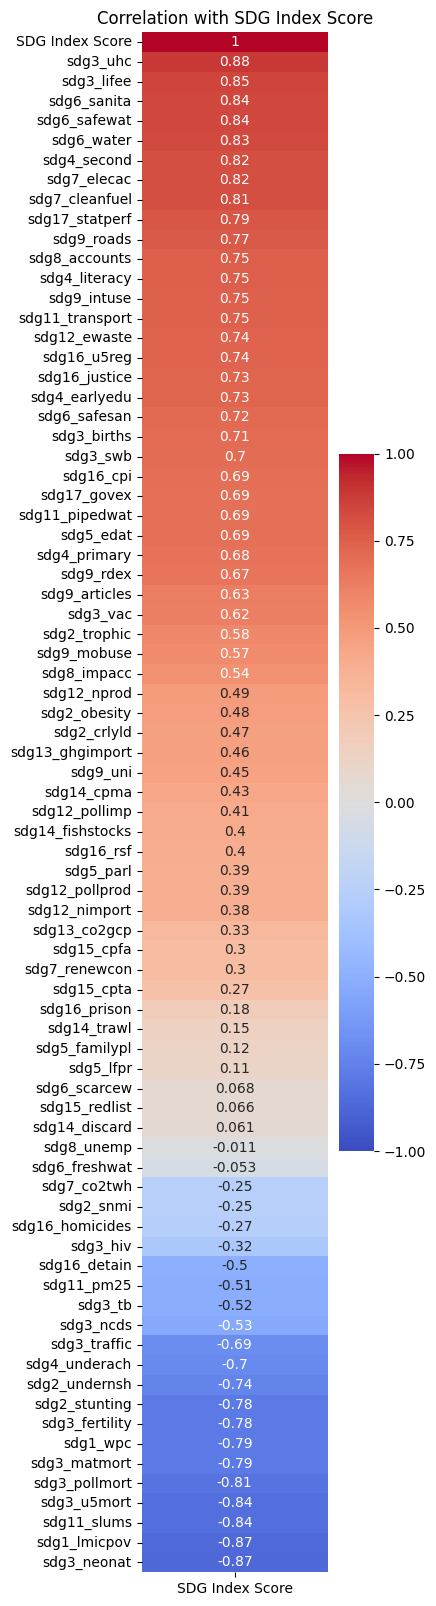

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ heatmap để thể hiện correlation với 'SDG Index Score'
plt.figure(figsize=(3, 20))
sns.heatmap(correlation_with_sdg[['SDG Index Score']].sort_values(by='SDG Index Score', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with SDG Index Score')
plt.show()

In [54]:
# Lọc ra hệ số tương quan của từng cột với 'SDG Index Score' 
correlation_with_sdg_index_score = correlation_with_sdg['SDG Index Score'].abs()

# Lọc các cột có correlation >= 0.5
columns_to_keep = correlation_with_sdg_index_score[correlation_with_sdg_index_score >= 0.4].index

# Giữ lại các cột có correlation >= 0.4 và tạo dataset mới
dataset_after_drop_cols = dataset[['Country', 'year'] + list(columns_to_keep)]

# In kết quả
dataset_after_drop_cols.shape

(4175, 58)

# Filling missing data with interpolation & Kmeans

## Nội suy linear

In [55]:
# Lọc các cột số (trừ cột 'Country' và 'year')
numeric_cols = dataset_after_drop_cols.select_dtypes(include=['number']).columns

# Lặp qua từng quốc gia trong dataset
for country in dataset_after_drop_cols['Country'].unique():
    # Lọc dữ liệu của từng quốc gia
    country_data = dataset_after_drop_cols[dataset_after_drop_cols['Country'] == country]
    
    # Áp dụng interpolation cho các cột số (trừ cột 'Country' và 'year')
    country_data[numeric_cols] = country_data[numeric_cols].interpolate(method='linear', axis=0)
    
    # Cập nhật lại vào dataset
    dataset_after_drop_cols.loc[dataset_after_drop_cols['Country'] == country, numeric_cols] = country_data[numeric_cols]

# In kết quả
print(dataset_after_drop_cols)

C:\Users\Bill Vo\AppData\Local\Temp\ipykernel_18132\1619931101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data[numeric_cols] = country_data[numeric_cols].interpolate(method='linear', axis=0)
C:\Users\Bill Vo\AppData\Local\Temp\ipykernel_18132\1619931101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data[numeric_cols] = country_data[numeric_cols].interpolate(method='linear', axis=0)
C:\Users\Bill Vo\AppData\Local\Temp\ipykernel_18132\1619931101.py:10: SettingWithCopyWarning: 

          Country  year  sdg1_wpc  sdg1_lmicpov  sdg2_undernsh  sdg2_stunting  \
0     Afghanistan  2000    61.704        85.021            NaN            NaN   
1     Afghanistan  2001    60.977        84.600           46.4            NaN   
2     Afghanistan  2002    60.256        84.167           44.1            NaN   
3     Afghanistan  2003    57.456        82.395           39.0            NaN   
4     Afghanistan  2004    58.409        82.993           36.3           59.3   
...           ...   ...       ...           ...            ...            ...   
4820     Zimbabwe  2020    43.342        67.431           39.1           23.5   
4821     Zimbabwe  2021    43.500        67.594           38.4           23.5   
4822     Zimbabwe  2022    42.311        66.370           38.4           23.5   
4823     Zimbabwe  2023    41.384        65.405           38.4           23.5   
4824     Zimbabwe  2024    40.562        64.609           38.4           23.5   

      sdg2_obesity  sdg2_tr

C:\Users\Bill Vo\AppData\Local\Temp\ipykernel_18132\1619931101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data[numeric_cols] = country_data[numeric_cols].interpolate(method='linear', axis=0)


In [56]:
# Kiểm tra lại các giá trị khuyết sau khi interpolated
missing_values = dataset_after_drop_cols.isnull().sum()
print("Số lượng giá trị khuyết trong các cột:")
print(missing_values)

Số lượng giá trị khuyết trong các cột:
Country               0
year                  0
sdg1_wpc            325
sdg1_lmicpov        325
sdg2_undernsh       322
sdg2_stunting       487
sdg2_obesity          0
sdg2_trophic        142
sdg2_crlyld          89
sdg3_matmort          0
sdg3_neonat          25
sdg3_u5mort          25
sdg3_tb              21
sdg3_ncds             0
sdg3_pollmort      3173
sdg3_traffic          0
sdg3_lifee            0
sdg3_fertility      153
sdg3_births         311
sdg3_vac             17
sdg3_uhc              0
sdg3_swb           1293
sdg4_earlyedu      2129
sdg4_primary        528
sdg4_second         689
sdg4_literacy      2440
sdg4_underach      2869
sdg5_edat            60
sdg6_water           44
sdg6_sanita          18
sdg6_safewat       1318
sdg6_safesan       1162
sdg7_elecac          16
sdg7_cleanfuel       50
sdg8_accounts      2061
sdg8_impacc         350
sdg9_roads         3841
sdg9_intuse          25
sdg9_mobuse        1484
sdg9_uni              0
s

## Clustering các quốc gia để điền khuyết Kmeans

### Clustering

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Bước 1: Lấy danh sách cột số, loại bỏ 'year' và 'SDG Index Score'
numeric_cols = dataset_after_drop_cols.select_dtypes(include=['number']).columns.drop(['year', 'SDG Index Score'])

# Clone dữ liệu từ dataset_after_drop_cols
df3 = dataset_after_drop_cols.copy()

# Ghi lại mask NaN ban đầu để biết cần điền chỗ nào
nan_mask = df3[numeric_cols].isna()

# Tạm thời điền NaN bằng -1
df3[numeric_cols] = df3[numeric_cols].fillna(-1)

# Chuẩn hóa dữ liệu (chỉ scale numeric_cols, không chuẩn hóa 'year' và 'SDG Index Score')
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_data = scaler.fit_transform(df3[numeric_cols])

# Gán lại giá trị chuẩn hóa vào df3
df3[numeric_cols] = scaled_data

# Gán lại giá trị gốc cho 'year' và 'SDG Index Score' để tránh bị ảnh hưởng
df3['year'] = dataset_after_drop_cols['year']
df3['SDG Index Score'] = dataset_after_drop_cols['SDG Index Score']

# Bước 6: Clustering theo từng năm
df3['Cluster'] = -1
for year in df3['year'].unique():
    year_mask = df3['year'] == year
    data_year = df3.loc[year_mask, numeric_cols]

    # Đổi -1 tạm thời thành 0 để tránh lỗi KMeans
    data_year_kmeans = data_year.replace(-1, 0)

    try:
        kmeans = KMeans(n_clusters=4, random_state=42)
        clusters = kmeans.fit_predict(data_year_kmeans)
        df3.loc[year_mask, 'Cluster'] = clusters
    except Exception as e:
        print(f"Không clustering được cho năm {year}: {e}") 


### Điền khuyết

In [67]:
# Điền khuyết lại từ Cluster
for col in numeric_cols:
    for cluster_id in df3['Cluster'].unique():
        if cluster_id == -1: continue
        mask = (df3['Cluster'] == cluster_id) & (df3[col] != -1)
        cluster_mean = df3.loc[mask, col].mean()

        # Điền lại chỗ từng NaN trong dữ liệu gốc (theo mask ban đầu)
        fill_mask = (df3['Cluster'] == cluster_id) & nan_mask[col]
        df3.loc[fill_mask, col] = cluster_mean

# Kiểm tra còn NaN không
print("Còn NaN không sau khi điền khuyết:", df3[numeric_cols].isna().sum().sum())

Còn NaN không sau khi điền khuyết: 0


In [70]:
df3

,Country,year,sdg1_wpc,sdg1_lmicpov,sdg2_undernsh,sdg2_stunting,sdg2_obesity,sdg2_trophic,sdg2_crlyld,sdg3_matmort,...,sdg13_ghgimport,sdg14_cpma,sdg16_detain,sdg16_u5reg,sdg16_cpi,sdg16_justice,sdg17_govex,sdg17_statperf,SDG Index Score,Cluster
0,Afghanistan,2000,69.193675,85.531758,31.180589,51.014685,8.391906,65.90,4.782586,79.773655,...,4.018115,19.441441,27.363283,17.391393,15.859947,20.485308,21.021498,17.388448,34.523077,1
1,Afghanistan,2001,68.391432,85.113153,65.924896,51.014685,9.137380,64.34,5.314867,75.443675,...,4.018115,19.441441,27.363283,17.391393,15.859947,20.485308,21.021498,17.388448,34.711906,1
2,Afghanistan,2002,67.595811,84.682615,62.726008,51.014685,9.925453,65.88,7.070600,75.680934,...,5.166391,19.441441,27.363283,17.391393,15.859947,20.485308,21.021498,17.388448,34.980294,1
3,Afghanistan,2003,64.506020,82.920694,55.632823,22.760040,10.777423,65.28,6.509189,70.876435,...,5.375968,27.810011,25.749857,33.721084,23.988846,39.419857,30.258522,29.972135,35.506009,3
4,Afghanistan,2004,65.557652,83.515293,51.877608,92.769231,11.671991,65.30,6.183465,66.071937,...,5.410898,19.441441,27.363283,17.391393,15.859947,20.485308,21.021498,17.388448,35.653523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,Zimbabwe,2020,48.931263,68.041801,55.771905,37.692308,27.518637,63.60,5.690906,21.099459,...,5.255303,19.441441,19.086139,49.207921,26.881720,76.074271,14.564062,69.713428,56.138099,1
4821,Zimbabwe,2021,49.105616,68.203874,54.798331,37.692308,28.541001,64.00,6.739579,21.099459,...,4.975867,19.441441,22.507921,49.207921,25.806452,75.490716,15.587483,76.571284,56.695311,1
4822,Zimbabwe,2022,47.793558,66.986835,54.798331,37.692308,29.605964,64.00,6.387374,21.099459,...,4.975867,19.441441,25.929703,49.207921,25.806452,76.339523,15.587483,75.597024,56.782297,1
4823,Zimbabwe,2023,46.770616,66.027324,54.798331,37.692308,29.605964,64.00,6.387374,21.099459,...,4.975867,21.985146,25.929703,49.207921,26.881720,76.339523,15.587483,75.597024,57.761626,2


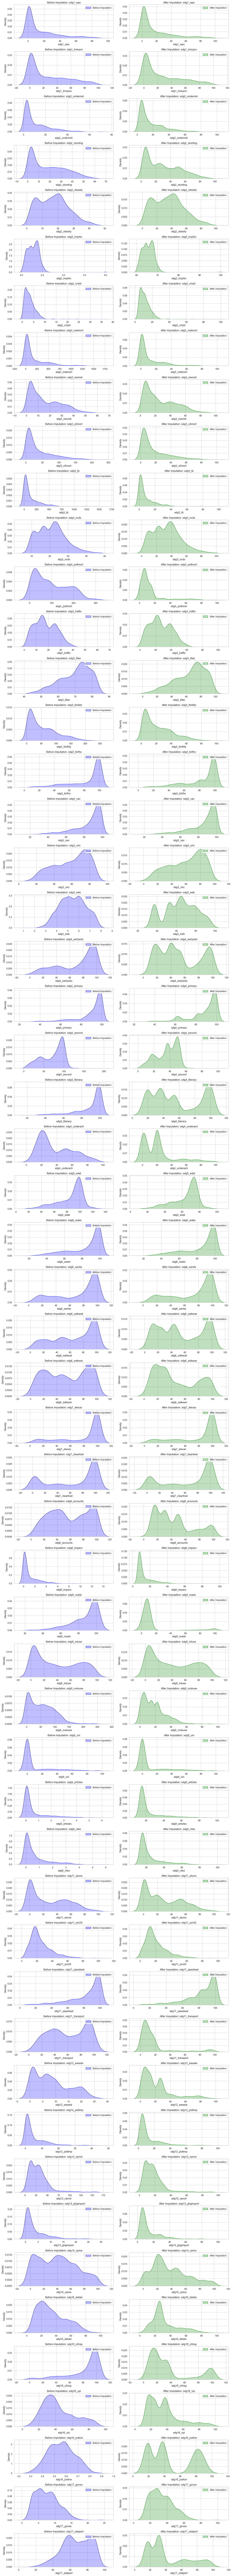

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước mặc định
sns.set(style="whitegrid")
plt.figure(figsize=(15, 3 * len(numeric_cols)))

# Duyệt từng cột để vẽ biểu đồ phân phối
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, 2*i + 1)
    sns.kdeplot(data=dataset_after_drop_cols, x=col, color="blue", label="Before Imputation", fill=True)
    plt.title(f"Before Imputation: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

    plt.subplot(len(numeric_cols), 2, 2*i + 2)
    sns.kdeplot(data=df3, x=col, color="green", label="After Imputation", fill=True)
    plt.title(f"After Imputation: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

# Save dataset

In [71]:
df3.columns

Index(['Country', 'year', 'sdg1_wpc', 'sdg1_lmicpov', 'sdg2_undernsh',
       'sdg2_stunting', 'sdg2_obesity', 'sdg2_trophic', 'sdg2_crlyld',
       'sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_ncds',
       'sdg3_pollmort', 'sdg3_traffic', 'sdg3_lifee', 'sdg3_fertility',
       'sdg3_births', 'sdg3_vac', 'sdg3_uhc', 'sdg3_swb', 'sdg4_earlyedu',
       'sdg4_primary', 'sdg4_second', 'sdg4_literacy', 'sdg4_underach',
       'sdg5_edat', 'sdg6_water', 'sdg6_sanita', 'sdg6_safewat',
       'sdg6_safesan', 'sdg7_elecac', 'sdg7_cleanfuel', 'sdg8_accounts',
       'sdg8_impacc', 'sdg9_roads', 'sdg9_intuse', 'sdg9_mobuse', 'sdg9_uni',
       'sdg9_articles', 'sdg9_rdex', 'sdg11_slums', 'sdg11_pm25',
       'sdg11_pipedwat', 'sdg11_transport', 'sdg12_ewaste', 'sdg12_pollimp',
       'sdg12_nprod', 'sdg13_ghgimport', 'sdg14_cpma', 'sdg16_detain',
       'sdg16_u5reg', 'sdg16_cpi', 'sdg16_justice', 'sdg17_govex',
       'sdg17_statperf', 'SDG Index Score', 'Cluster'],
      dty

In [74]:
df3 = df3.drop('Cluster', axis=1)

In [76]:
# Lưu dataset vào file CSV
df3.to_csv('new dataset 3.csv', index=False)


# Group SDG

In [83]:
# Khởi tạo df4 với các cột cơ bản
df4 = df3[['Country', 'year', 'SDG Index Score']].copy()

# Tạo cột trung bình cho từng SDG từ 1 đến 17
for i in range(1, 18):
    prefix = f'sdg{i}_'
    sdg_cols = [col for col in df3.columns if col.startswith(prefix)]
    
    if sdg_cols:
        df4[f'SDG{i}'] = df3[sdg_cols].mean(axis=1)
    else:
        print(f'Không tìm thấy cột con nào cho SDG {i}')

Không tìm thấy cột con nào cho SDG 10
Không tìm thấy cột con nào cho SDG 15


In [84]:
df4

,Country,year,SDG Index Score,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG11,SDG12,SDG13,SDG14,SDG16,SDG17
0,Afghanistan,2000,34.523077,77.362717,32.253953,44.140189,25.755156,13.198979,18.542058,6.508416,10.747392,8.076084,25.349474,3.961943,4.018115,19.441441,20.274983,19.204973
1,Afghanistan,2001,34.711906,76.752293,39.146366,44.606365,25.755156,13.570980,18.555672,9.403465,10.750680,6.251072,27.760891,3.965127,4.018115,19.441441,20.274983,19.204973
2,Afghanistan,2002,34.980294,76.139213,39.323349,46.700958,25.755156,13.924491,19.709880,12.343564,10.744103,6.251072,27.665559,4.114418,5.166391,19.441441,20.274983,19.204973
3,Afghanistan,2003,35.506009,73.713357,32.191895,43.303752,46.101220,14.260992,25.918519,15.332178,18.597244,9.086676,21.056690,7.695193,5.375968,27.810011,30.719911,30.115328
4,Afghanistan,2004,35.653523,74.536472,45.560459,43.156775,25.755156,14.581222,22.025474,18.274257,10.763836,6.270117,28.015986,3.967163,5.410898,19.441441,20.274983,19.204973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,Zimbabwe,2020,56.138099,58.486532,38.054751,47.720933,52.692511,63.900455,39.805198,42.102970,34.797552,13.988517,43.286720,6.186770,5.255303,19.441441,42.812513,42.138745
4821,Zimbabwe,2021,56.695311,58.654745,38.354244,46.669187,55.077563,63.900455,39.391584,40.237624,35.349532,14.706847,43.283290,6.176638,4.975867,19.441441,43.253252,46.079383
4822,Zimbabwe,2022,56.782297,57.390197,38.496795,46.875685,55.684691,63.900455,39.414356,40.237624,35.349532,14.804738,43.824629,6.041952,4.975867,19.441441,44.320899,45.592254
4823,Zimbabwe,2023,57.761626,56.398970,38.496795,47.111085,56.654830,63.900455,39.414356,40.237624,35.349532,31.660567,43.824629,5.957645,4.975867,21.985146,44.589717,45.592254


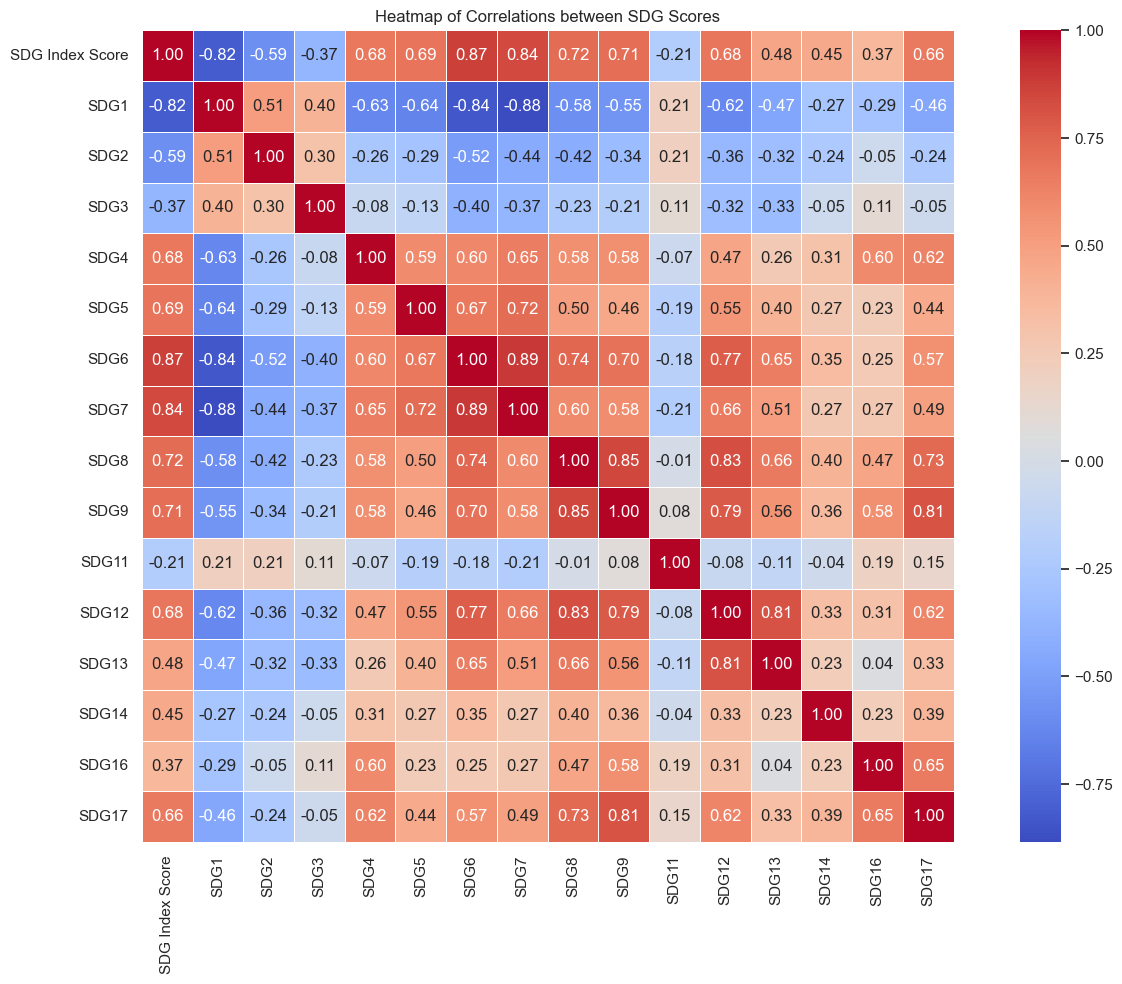

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = df4.drop(columns=['Country', 'year']).corr()

# Vẽ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Heatmap of Correlations between SDG Scores')
plt.tight_layout()
plt.show()

In [86]:
# Lưu dataset vào file CSV
df4.to_csv('new dataset SDG.csv', index=False)